In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned and merged dataset
df = pd.read_csv('../data/california_reviews_merged.csv')
print(df.head())
print(df.info())

                                               text  rating           time  \
0                      Love there korean rice cake.       5  1609909927056   
1                                    Good very good       5  1612849648663   
2  They make Korean traditional food very properly.       4  1583643882296   
3                    Short ribs are very delicious.       5  1551938216355   
4      Great food and prices the portions are large       5  1494910901933   

                 user_id                                gmap_id  \
0  108991152262655788985  0x80c2c778e3b73d33:0xbdc58662a4a97d49   
1  111290322219796215751  0x80c2c778e3b73d33:0xbdc58662a4a97d49   
2  112640357449611959087  0x80c2c778e3b73d33:0xbdc58662a4a97d49   
3  117440349723823658676  0x80c2c778e3b73d33:0xbdc58662a4a97d49   
4  100580770836123539210  0x80c2c778e3b73d33:0xbdc58662a4a97d49   

                category description  avg_rating  num_of_reviews  
0  ['Korean restaurant']         NaN         4.4             

In [7]:
# Create the review length column if you haven't already
df['review_length'] = df['text'].astype(str).apply(len)

# Print a statistical summary
print(df['review_length'].describe())

# Get specific percentiles for a detailed look
print(df['review_length'].quantile([0.5, 0.75, 0.9, 0.95, 0.99]))

count    2.325803e+07
mean     1.159778e+02
std      1.739811e+02
min      1.000000e+00
25%      2.900000e+01
50%      6.200000e+01
75%      1.340000e+02
max      1.305700e+04
Name: review_length, dtype: float64
0.50     62.0
0.75    134.0
0.90    267.0
0.95    394.0
0.99    810.0
Name: review_length, dtype: float64


The above analysis shows that there are around 23 million reviews that are being screen after the initial data cleansing. There is a mean of 116 words per review and a median of 62 characters which is a huge disparity and a skew rightwards where there is even a review with 13000 characters! And the smallest review being a singular character which is likely to one to sieve out and throw. 99% of reviews are lesser than 810 characters which could be used as a cutoff and we can zoom in on the remaining 1% where you may get rants, long paragraphs to commend businesses.

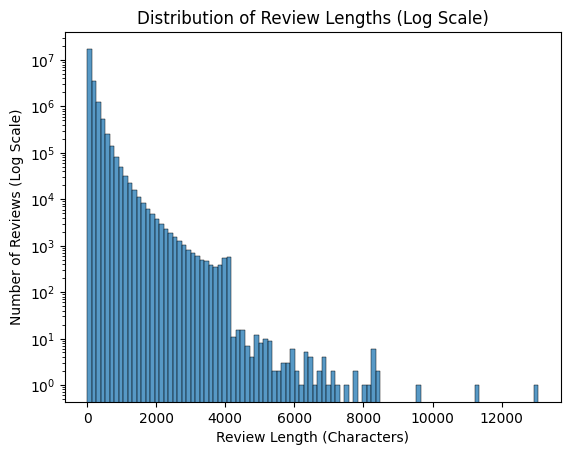

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='review_length', bins=100) # Use more bins for detail
plt.yscale('log') # This is the key change
plt.title('Distribution of Review Lengths (Log Scale)')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Number of Reviews (Log Scale)')
plt.show()

In [9]:
# Create a list of keywords for different types of violations
spam_keywords = ['http', 'www', 'promo code', 'discount', 'free', 'buy now']
irrelevant_keywords = ['covid', 'political', 'unrelated']
rant_keywords = ['never again', 'worst', 'disgusting']

# Find reviews with URLs, as they are often ads
url_violations = df[df['text'].str.contains('http|www', case=False, na=False)]
print(f"Found {len(url_violations)} reviews containing URLs.")

# Find reviews that might be irrelevant based on keywords
irrelevant_violations = df[df['text'].str.contains('|'.join(irrelevant_keywords), case=False, na=False)]
print(f"Found {len(irrelevant_violations)} potentially irrelevant reviews.")

Found 3442 reviews containing URLs.
Found 87220 potentially irrelevant reviews.


In [1]:
import pandas as pd
import numpy as np

# Load your merged data
df = pd.read_csv('../data/california_reviews_merged.csv')

# --- Keyword Search for Policy Violations ---

# Create a master list of keywords to search for
# 'r' denotes a raw string to handle backslashes correctly in regex
# '|' acts as an 'OR' operator
spam_and_ads_patterns = r'http|www|promo code|discount|free|buy now|offer'
irrelevant_content_patterns = r'covid|political|unrelated|wrong business'
rant_patterns = r'never again|worst|horrible|disgusting|ripoff|scam'

# Create boolean masks for each type of violation
is_spam_or_ad = df['text'].str.contains(spam_and_ads_patterns, case=False, na=False)
is_irrelevant = df['text'].str.contains(irrelevant_content_patterns, case=False, na=False)
is_rant = df['text'].str.contains(rant_patterns, case=False, na=False)

# --- Use these boolean masks to create your labeled dataset ---

# Step 1: Create your labeled subset of data
labeled_df = df.sample(n=20000, random_state=42).copy()

# Step 2: Initialize a new column to store your labels
labeled_df['is_problematic'] = 0

# Step 3: Use the masks to automatically label reviews.
# This makes your manual labeling much easier.

# Label ads/spam as problematic
labeled_df.loc[labeled_df['text'].str.contains(spam_and_ads_patterns, case=False, na=False), 'is_problematic'] = 1

# Label rants/irrelevant as problematic
labeled_df.loc[labeled_df['text'].str.contains(irrelevant_content_patterns, case=False, na=False), 'is_problematic'] = 1
labeled_df.loc[labeled_df['text'].str.contains(rant_patterns, case=False, na=False), 'is_problematic'] = 1

# Step 4: Manually review the automatically labeled data to ensure accuracy
# Print a few to check
print(labeled_df[labeled_df['is_problematic'] == 1].head())

# Save your final labeled dataset
labeled_df.to_csv('../data/labeled_reviews.csv', index=False)

                                                       text  rating  \
21846619  (Translated by Google) The hotel's opinions di...       5   
7521386   Horrible service workers don't understand Engl...       1   
14393094  Nice and cozy restaurant on waterfront in Emer...       4   
20876376  Always a great stop when in San Diego. Good be...       4   
6522288   I really love this place, there's a little bit...       4   

                   time                user_id  \
21846619  1472111839710  116708365147224152633   
7521386   1603140146100  104562753902608823661   
14393094  1520363077147  108410337729259732061   
20876376  1488320950625  106206787116116204101   
6522288   1573267981431  105936603351273890202   

                                        gmap_id  \
21846619  0x80c2b12ae53c5d3f:0x9c3589c1951fc19f   
7521386   0x80dd2d11c50874dd:0x9d1ee9a945f5844d   
14393094  0x80857e507fb91ef5:0x9809ca65b46daa36   
20876376  0x80d9535a3ebb533d:0xe4f887714fe0b89d   
6522288   0x80d95

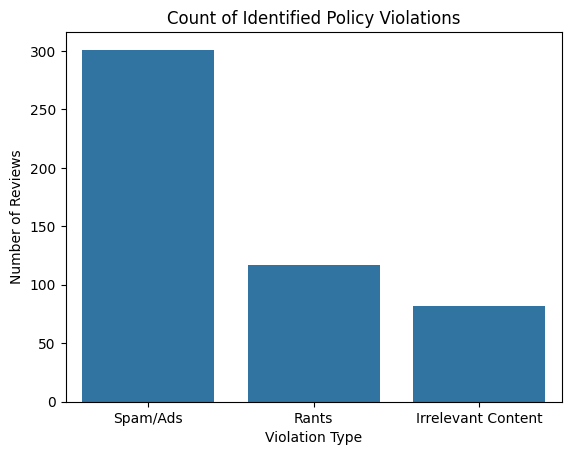

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your labeled data, if you haven't already
labeled_df = pd.read_csv('../data/labeled_reviews.csv')

# --- Count the types of violations ---
# Create a temporary column to flag each type of violation
labeled_df['is_spam'] = labeled_df['text'].str.contains('http|www|promo|free', case=False, na=False)
labeled_df['is_rant'] = labeled_df['text'].str.contains('worst|never again|disgusting', case=False, na=False)
labeled_df['is_irrelevant'] = labeled_df['text'].str.contains('covid|political', case=False, na=False)

# Count the number of reviews in each category
violation_counts = {
    'Spam/Ads': labeled_df['is_spam'].sum(),
    'Rants': labeled_df['is_rant'].sum(),
    'Irrelevant Content': labeled_df['is_irrelevant'].sum()
}

# Convert to a DataFrame for plotting
counts_df = pd.DataFrame(violation_counts.items(), columns=['Violation Type', 'Count'])

# --- Create a bar chart ---
sns.barplot(data=counts_df, x='Violation Type', y='Count')
plt.title('Count of Identified Policy Violations')
plt.ylabel('Number of Reviews')
plt.xlabel('Violation Type')
plt.show()

This shows that the initial dataset of 20000 reviews chosen was quite skewed as only about 2.5% of the data where flagged as '1' or as problematic so its a highly imbalanced set and could explain the baseline model's recall being so low for the problematic reviews.